In [ ]:
!pip install timm
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
subscription_key = os.environ.get('AZURE_SEARCH_KEY')

In [4]:
butterfly_types = (
    'gonepteryx rhamni',
    'aglais urticae',
    'vanessa atalanta',
    'aglais io',
)
path = Path('butterflies')

In [5]:
if not path.exists():
    path.mkdir()
    for o in butterfly_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(subscription_key, f'{o}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [6]:
fns = get_image_files(path)
fns

(#570) [Path('butterflies/gonepteryx rhamni/85dc0f53-e605-4f87-9784-2e328be8d9a2.jpg'),Path('butterflies/gonepteryx rhamni/8280dec1-46ed-4345-b416-689a506435e0.jpeg'),Path('butterflies/gonepteryx rhamni/a898904e-f599-4b23-aebc-b0b202163bf8.jpg'),Path('butterflies/gonepteryx rhamni/839da425-9f45-42fb-9afc-7377607ffcf9.jpg'),Path('butterflies/gonepteryx rhamni/956d0894-7ba0-4dad-9bce-bac3dcee529e.jpg'),Path('butterflies/gonepteryx rhamni/235054ad-0811-4de6-bbe2-a93f49045a82.jpg'),Path('butterflies/gonepteryx rhamni/b360a623-5ed4-4dfa-81df-bfe0791ae05e.jpg'),Path('butterflies/gonepteryx rhamni/47a9a014-2512-47a7-93ee-5ea00085198e.jpg'),Path('butterflies/gonepteryx rhamni/ac39324d-8dfa-4f07-a301-a60a15402e8a.jpg'),Path('butterflies/gonepteryx rhamni/f60f2216-4503-440c-8e09-83cee3b35f12.jpg')...]

In [7]:
failed = verify_images(fns)
failed

(#7) [Path('butterflies/gonepteryx rhamni/3bfd54df-3dad-47c3-9df5-0a80593916ee.jpg'),Path('butterflies/aglais io/e0fb4ac7-b4b8-4951-944d-27b77143c996.jpg'),Path('butterflies/aglais urticae/7bc5d9ba-6661-4439-8a8d-6333868ac51f.jpg'),Path('butterflies/aglais urticae/bc994392-fa28-45e8-8f39-f4415401945e.jpg'),Path('butterflies/aglais urticae/dba2ce3a-b2ca-45cf-bec2-204d445d9432.jpg'),Path('butterflies/aglais urticae/2b898c57-c0a3-40fe-bb59-1c48c61ca4d7.jpg'),Path('butterflies/aglais urticae/b91a0c66-ce38-448b-a3df-00e01a29925d.jpg')]

In [8]:
failed.map(Path.unlink);

In [18]:
butterflies = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [19]:
dls = butterflies.dataloaders(path)

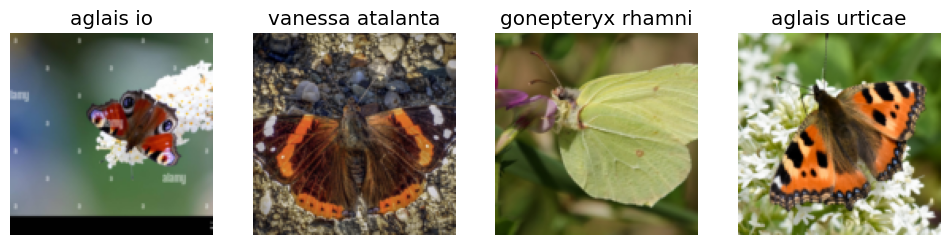

In [20]:
dls.valid.show_batch(max_n=4, nrows=1)

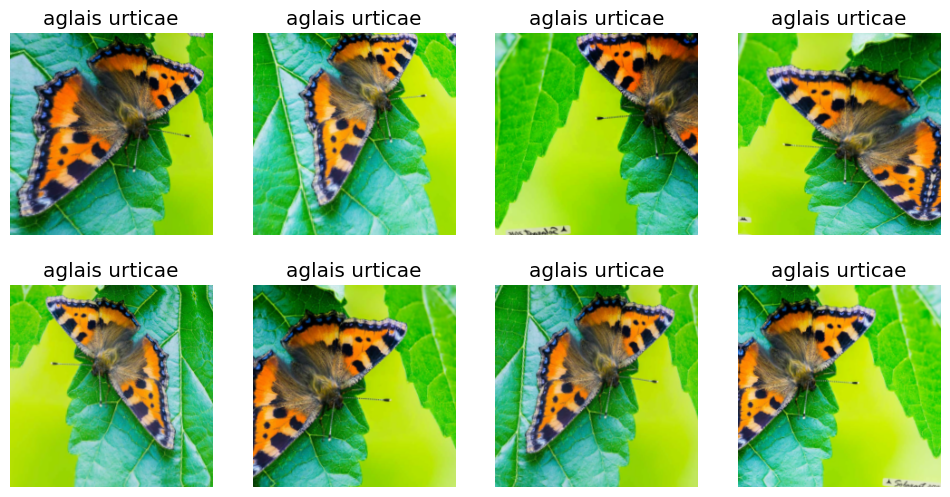

In [21]:
butterflies = butterflies.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = butterflies.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
learn = vision_learner(dls, "resnet26d", metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.125064,0.324682,0.071429,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.173520,0.281572,0.080357,00:17
1,0.152486,0.286305,0.062500,00:18
2,0.134640,0.338361,0.071429,00:22
3,0.108922,0.303814,0.071429,00:16


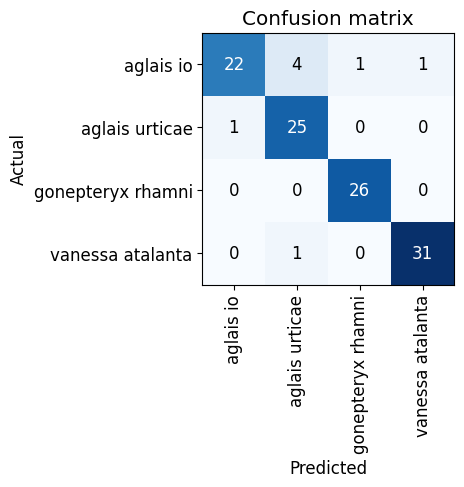

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

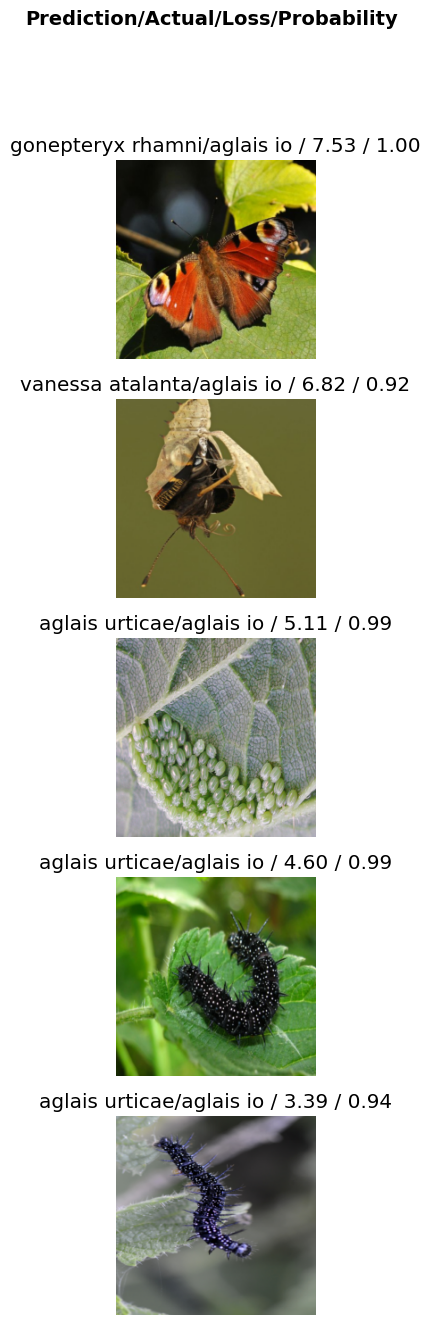

In [24]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]